### Data Description


1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
    + Iris Setosa
    + Iris Versicolour 
    + Iris Virginica




In [1]:
## config plot size
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 12)

Populating the interactive namespace from numpy and matplotlib


Importanto o dataset

In [2]:
import os 
path = os.path.join('dataset/iris')
print(os.listdir(path))

['iris.name', 'Index', 'iris.data', 'bezdekIris.data']


Load Dataset

In [3]:
import pandas as pd

data = pd.read_csv(path+'/iris.data', header=None)

In [4]:
data = data.rename_axis({0:'sepal_h', 1:'sepal_w', 2:'petal_h', 3:'petal_w', 4:'class'}, axis='columns')
data.head()

,sepal_h,sepal_w,petal_h,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Visualização dos dados

In [5]:
import seaborn
from sklearn.manifold import TSNE

def plot_iris(data, annot=True):

    # making TSNE
    plt.subplot(221)

    color_map = {'Iris-setosa':'red', 'Iris-virginica':'green', 'Iris-versicolor':'blue'}
        
    data_transform = TSNE(n_components=2).fit_transform(data.iloc[:, :-1])
    
    data_transform = pd.DataFrame(data_transform)
    data_transform['class'] = data['class']
     
    for label in np.array(data_transform):
        plt.scatter(label[0], label[1], c=color_map[label[2]])
    
    # making heatmap 
    plt.subplot(222)
    
    seaborn.heatmap(data.corr(), cmap='YlGnBu', annot=annot)
    
    # making histogram of classes
    plt.subplot(223)
    
    seaborn.countplot(y='class', data=data)
    
    # making boxplot of features
    plt.subplot(224)
    data.boxplot()
    
    plt.show()
    
    

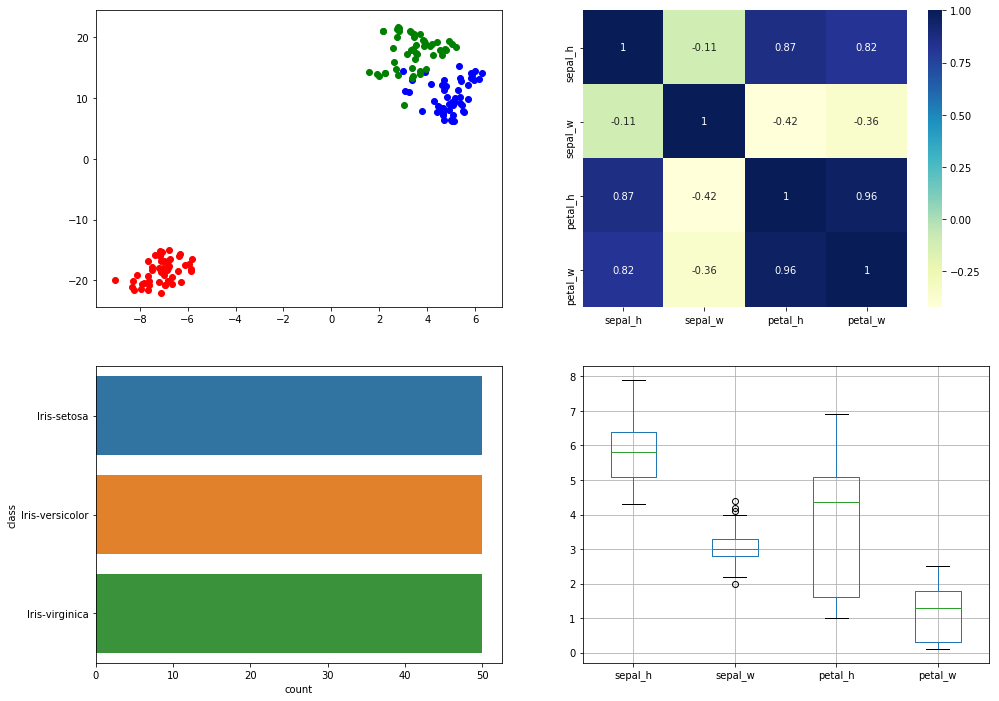

In [6]:
plot_iris(data)